# 
## Participants: Allen Daniel, Hardeep Gumber, Anvita Iyer, Krishan Pandey, Aleksandra Kutz
### Data Source

https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

In [1]:
# Heart disease project

In [2]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from pathlib import Path
import scipy.stats as stats
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from scipy.stats import chi2_contingency

In [3]:
#Import csv file

heart_disease_path = Path("heart_good_database.csv")
first_data_set = pd.read_csv(heart_disease_path)
first_data_set.head()

# -- We can remove this latter, I wanted to be able to quickly check what is in which column to make work easier ;) ---

#[age] = age 
#[sex] = sex (1 = male; 0 = female)
#[cp]  =  chest pain type (4 values) 
#[trestbps] = resting blood pressure 
#[chol] = serum cholestoral in mg/dl  
#[fbs] = fasting blood sugar > 120 mg/dl  
#[restecg] = resting electrocardiographic results (values 0,1,2)
#[thalach] = maximum heart rate achieved 
#[exang] = exercise induced angina 
#[oldpeak] = oldpeak = ST depression induced by exercise relative to rest
#[slope] = the slope of the peak exercise ST segment
#[ca] = number of major vessels (0-3) colored by flourosopy 
#[thal] = thal: 0 = normal; 1 = fixed defect; 2 = reversable defect 
#[target] = The presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,1
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,1
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,1
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,1
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,1


In [4]:
first_data_set.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
#Find duplicate rows
duplicates = first_data_set[first_data_set.duplicated()]

# Display the duplicate rows
duplicates

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,0
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,0
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,1
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,1
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,0
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,1
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,1
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,0


In [6]:
heart_disease_df = first_data_set.drop_duplicates(keep='last')
heart_disease_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
138,47,1,2,138,257,0,0,156,0,0.0,2,0,2,0
155,54,1,1,108,309,0,1,156,0,0.0,2,0,3,0
283,64,1,3,110,211,0,0,144,1,1.8,1,0,2,0
293,59,1,2,150,212,1,1,157,0,1.6,2,0,2,0
295,67,1,0,100,299,0,0,125,1,0.9,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,0
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,1
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,1
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,0


In [7]:
#Hypothesis#1
#Men are most likely to develop heart disease than women (0 is the no disease, 1 = disease)
#Bar chart (Target vs gender), pie chart

counts = heart_disease_df['sex'].value_counts()
all_women = counts.get(0, 0)  
print(f"Number of women: {all_women}")

counts = heart_disease_df['sex'].value_counts()
all_men = counts.get(1, 0)
print(f"Number of men: {all_men}")

filter_df = heart_disease_df[heart_disease_df['sex'] == 0 ]
count_ill_women = (filter_df['target'] == 1).sum()
print(f"Number of women with heart disease: {count_ill_women}")

filtered_df = heart_disease_df[heart_disease_df['sex'] == 1 ]
count_ill_men = (filtered_df['target'] == 1).sum()
print(f"Number of men with heart disease: {count_ill_men}")

Number of women: 96
Number of men: 206
Number of women with heart disease: 24
Number of men with heart disease: 114


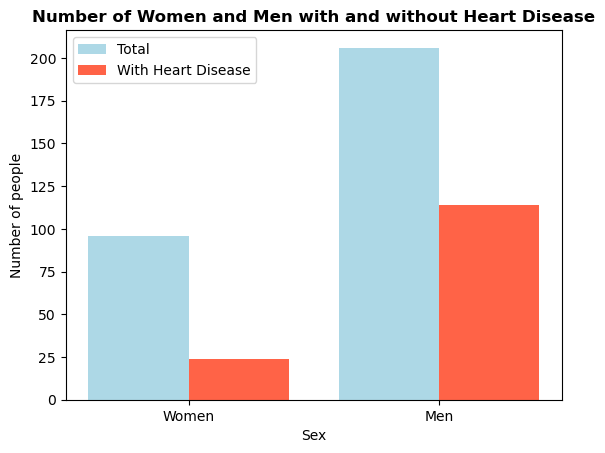

In [8]:
#------------------------------ Bar Chart: -------------------------------
categories = ['Women', 'Men']
total_counts = [all_women, all_men]
ill_counts = [count_ill_women, count_ill_men]

x = range(len(categories))

plt.bar(x, total_counts, width=0.4, label='Total', color='lightblue', align='center')
plt.bar([p + 0.4 for p in x], ill_counts, width=0.4, label='With Heart Disease', color='tomato', align='center')

plt.xlabel('Sex')
plt.ylabel('Number of people')
plt.title('Number of Women and Men with and without Heart Disease', fontweight='bold')
plt.xticks([p + 0.2 for p in x], categories)
plt.legend()

plt.savefig("my_plot_gender_bar.png")
plt.show()

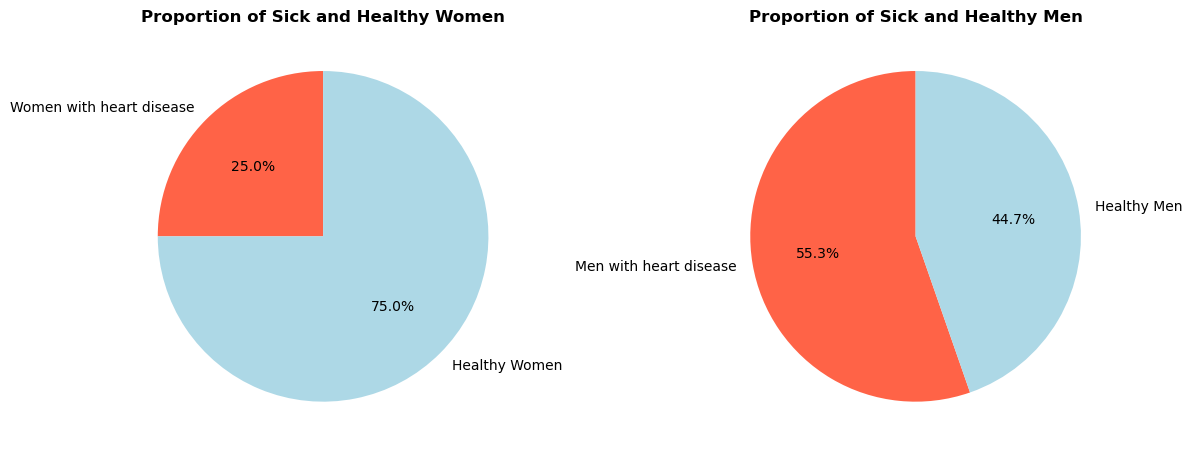

In [9]:
#----------------------------- Pie Charts: -------------------------


ill_women = heart_disease_df[(heart_disease_df['sex'] == 0) & (heart_disease_df['target'] == 1)].shape[0]
healthy_women = all_women - ill_women

ill_men = heart_disease_df[(heart_disease_df['sex'] == 1) & (heart_disease_df['target'] == 1)].shape[0]
healthy_men = all_men - ill_men

plt.figure(figsize=(12, 6)) 

labels_women = ['Women with heart disease', 'Healthy Women']
sizes_women = [ill_women, healthy_women]
colors_women = ['tomato', 'lightblue']


plt.subplot(1, 2, 1)
plt.pie(sizes_women, labels=labels_women, colors=colors_women, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Sick and Healthy Women', fontweight='bold')

labels_men = ['Men with heart disease', 'Healthy Men']
sizes_men = [ill_men, healthy_men]
colors_men = ['tomato', 'lightblue']


plt.subplot(1, 2, 2)
plt.pie(sizes_men, labels=labels_men, colors=colors_men, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Sick and Healthy Men', fontweight='bold')

plt.tight_layout()

plt.savefig("my_plot_gender_pie.png")

plt.show()

In [10]:
#Hypothesis#1
# I'm running the chi-squared test

contingency_table1 = pd.crosstab(heart_disease_df['sex'], heart_disease_df['target'], 
                                  rownames=['Sex'], colnames=['Heart Disease'])

print(contingency_table1)

chi2, p, dof, expected = chi2_contingency(contingency_table1)

print(f"Chi-squared Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")

alpha = 0.05 
if p < alpha:
    print("Reject the null hypothesis - there is a significant association between gender and heart disease.")
else:
    print("Fail to reject the null hypothesis - there is no significant association between gender and heart disease.")

Heart Disease   0    1
Sex                   
0              72   24
1              92  114
Chi-squared Statistic: 23.083879459669042
P-value: 1.5508552054949549e-06
Degrees of Freedom: 1
Expected Frequencies:
[[ 52.13245033  43.86754967]
 [111.86754967  94.13245033]]
Reject the null hypothesis - there is a significant association between gender and heart disease.


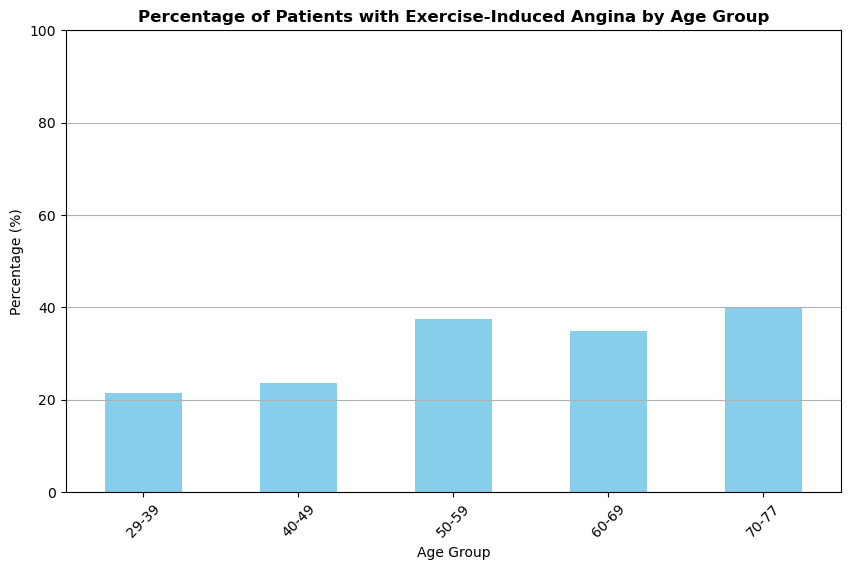

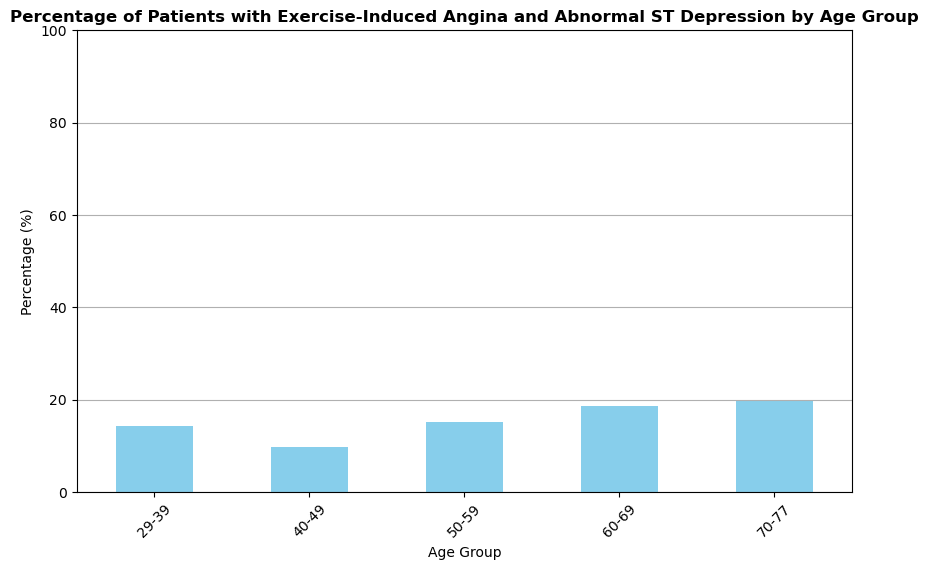

In [26]:
#Hypothesis#2 

#Older patients are more likely to have exercise-induced angina and abnormal ST depression levels.
#Bins to divide age into 5 groups: 29-39, 40-49. 50-69, 60-69, 70-77

#"Measurement. ST segment depression may be determined by measuring the vertical distance between the patient's
#trace and the isoelectric line at a location 2-3 millimeters from the QRS complex. It is significant if it 
#is more than 1 mm in V5-V6, or 1.5 mm in AVF or III."-> from https://en.wikipedia.org/wiki/ST_depression#:~:text=the%20ECG%20paper.-,Measurement,mm%20in%20AVF%20or%20III.

bins = [29, 39, 49, 59, 69, 77]
labels = ['29-39', '40-49', '50-59', '60-69', '70-77']
heart_disease_df.loc[:, 'age_group'] = pd.cut(heart_disease_df['age'], bins=bins, labels=labels, right=True)

#---------------------------Bar Chart Exercise-Induced Angina across age groups --------------------------

exang_df = heart_disease_df[heart_disease_df['exang'] == 1]

total_exang_count = exang_df.groupby('age_group', observed=True).size()
overall_count = heart_disease_df.groupby('age_group', observed=True).size()
percentage_exang = (total_exang_count / overall_count) * 100

plt.figure(figsize=(10, 6))
percentage_exang.plot(kind='bar', color='skyblue')
plt.title('Percentage of Patients with Exercise-Induced Angina by Age Group', fontweight='bold')
plt.xlabel('Age Group')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(axis='y')
plt.savefig("my_plot_bar_Angina.png")
plt.show()

#-------------------------Bar Chart Exercise-Induced Angina and Oldpeak > 1.5 across age groups -----------

filt_df = heart_disease_df[(heart_disease_df['exang'] == 1) & (heart_disease_df['oldpeak'] > 1.5)]

double_diagnosis_count = filt_df.groupby('age_group', observed=True).size()
total_count = heart_disease_df.groupby('age_group', observed=True).size()

percentage_with_conditions = (double_diagnosis_count / total_count) * 100

plt.figure(figsize=(10, 6))
percentage_with_conditions.plot(kind='bar', color='skyblue')
plt.title('Percentage of Patients with Exercise-Induced Angina and Abnormal ST Depression by Age Group', fontweight='bold')
plt.xlabel('Age Group')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(axis='y')
plt.savefig("my_plot_bar_Angina_Oldpeak.png")
plt.show()

In [11]:
#Hypothesis#2
# I'm running the chi-squared test

contingency_table2 = pd.crosstab(heart_disease_df['age_group'], 
                                  (heart_disease_df['exang'] == 1) & (heart_disease_df['oldpeak'] > 1.5), 
                                  rownames=['Age Group'], 
                                  colnames=['Exercise-Induced Angina & Abnormal ST Depression'])

print("Contingency Table:\n", contingency_table2)

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table2)

print(f"Chi-squared Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")

# Interpret the result
alpha = 0.05  # significance level
if p < alpha:
    print("Reject the null hypothesis - there is a significant association between age groups and exercise-induced angina with abnormal ST depression.")
else:
    print("Fail to reject the null hypothesis - there is no significant association between age groups and exercise-induced angina with abnormal ST depression.")

Contingency Table:
 Exercise-Induced Angina & Abnormal ST Depression  False  True 
Age Group                                                     
29-39                                                12      2
40-49                                                65      7
50-59                                               106     19
60-69                                                65     15
70-77                                                 8      2
Chi-squared Statistic: 2.6676574990354944
P-value: 0.6148858793384961
Degrees of Freedom: 4
Expected Frequencies:
[[ 11.90697674   2.09302326]
 [ 61.2358804   10.7641196 ]
 [106.31229236  18.68770764]
 [ 68.03986711  11.96013289]
 [  8.50498339   1.49501661]]
Fail to reject the null hypothesis - there is no significant association between age groups and exercise-induced angina with abnormal ST depression.


Number of patients with fasting blood sugar > 120 mg/dl: 45
Number of patients with fasting blood sugar > 120 mg/dl and heart disease: 22
Number of patients with fasting blood sugar <= 120 mg/dl: 257
Number of patients with fasting blood sugar <= 120 mg/dl and heart disease: 116


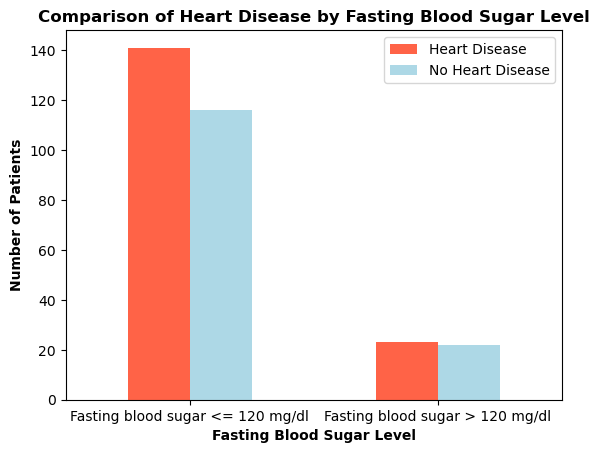

In [12]:
#Hypothesis#3 
#Patients with fasting blood sugar > 120 mg/dl are more likely to have heart disease

#--------- Checking patients with high sugar: -------------

high_sugar = heart_disease_df[heart_disease_df['fbs'] == 1 ]

total_high_sugar_patients = high_sugar.shape[0]
print(f"Number of patients with fasting blood sugar > 120 mg/dl: {total_high_sugar_patients}")

high_sugar_sick = (high_sugar['target'] == 1).sum()
high_sugar_healthy = (high_sugar['target'] == 0).sum()

print(f"Number of patients with fasting blood sugar > 120 mg/dl and heart disease: {high_sugar_sick}")

#--------- Checking control group: ------------

low_sugar = heart_disease_df[heart_disease_df['fbs'] == 0 ]

total_low_sugar_patients = low_sugar.shape[0]
print(f"Number of patients with fasting blood sugar <= 120 mg/dl: {total_low_sugar_patients}")

low_sugar_sick = (low_sugar['target'] == 1).sum()
low_sugar_healthy = (low_sugar['target'] == 0).sum()

print(f"Number of patients with fasting blood sugar <= 120 mg/dl and heart disease: {low_sugar_sick}")

#------------Chart bar ---------------------

summary = heart_disease_df.groupby(['fbs', 'target']).size().unstack(fill_value=0)

summary.plot(kind='bar', stacked=False, color=['tomato', 'lightblue'])
plt.xlabel('Fasting Blood Sugar Level', fontweight='bold')
plt.ylabel('Number of Patients', fontweight='bold')
plt.title('Comparison of Heart Disease by Fasting Blood Sugar Level', fontweight='bold')
plt.xticks(ticks=[0, 1], labels=['Fasting blood sugar <= 120 mg/dl', 'Fasting blood sugar > 120 mg/dl'], rotation=0)
plt.legend(['Heart Disease', 'No Heart Disease'])

plt.savefig("my_plot_sugar_bar.png")
plt.show()



In [13]:
#Hypothesis#3
# I'm running the chi-squared test

contingency_table3 = pd.crosstab(heart_disease_df['fbs'], heart_disease_df['target'], 
                                  rownames=['Fasting Blood Sugar'], colnames=['Heart Disease'])

print("Contingency Table:\n", contingency_table3)

chi2, p, dof, expected = chi2_contingency(contingency_table3)

print(f"Chi-squared Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")

alpha = 0.05 
if p < alpha:
    print("Reject the null hypothesis - there is a significant association between fasting blood sugar levels and heart disease.")
else:
    print("Fail to reject the null hypothesis - there is no significant association between fasting blood sugar levels and heart disease.")
    
print("Expected Frequencies indicated there is not enough people in the test to be able to reject the null hypothesis")    

Contingency Table:
 Heart Disease          0    1
Fasting Blood Sugar          
0                    141  116
1                     23   22
Chi-squared Statistic: 0.09240835568001493
P-value: 0.7611374700928197
Degrees of Freedom: 1
Expected Frequencies:
[[139.56291391 117.43708609]
 [ 24.43708609  20.56291391]]
Fail to reject the null hypothesis - there is no significant association between fasting blood sugar levels and heart disease.
Expected Frequencies indicated there is not enough people in the test to be able to reject the null hypothesis


Hypothesis 4 (DANIEL ALLEN): The interaction between age, maximum heart rate achieved during exercise, and exercise-induced angina, along with the number of major vessels affected, significantly predicts the likelihood of chest pain (angina) in patients.

3D Surface Plot:
A 3D plot (e.g., age vs. thalach vs. probability of chest pain) to visually capture the interaction effect of age and thalach on the probability of chest pain.

Heatmap:
A heatmap showing the combined influence of exercise-induced angina (exang) and number of major vessels (ca) on the probability of chest pain would provide a more detailed view of the interaction effect.
    

Optimization terminated successfully.
         Current function value: 0.589132
         Iterations 6


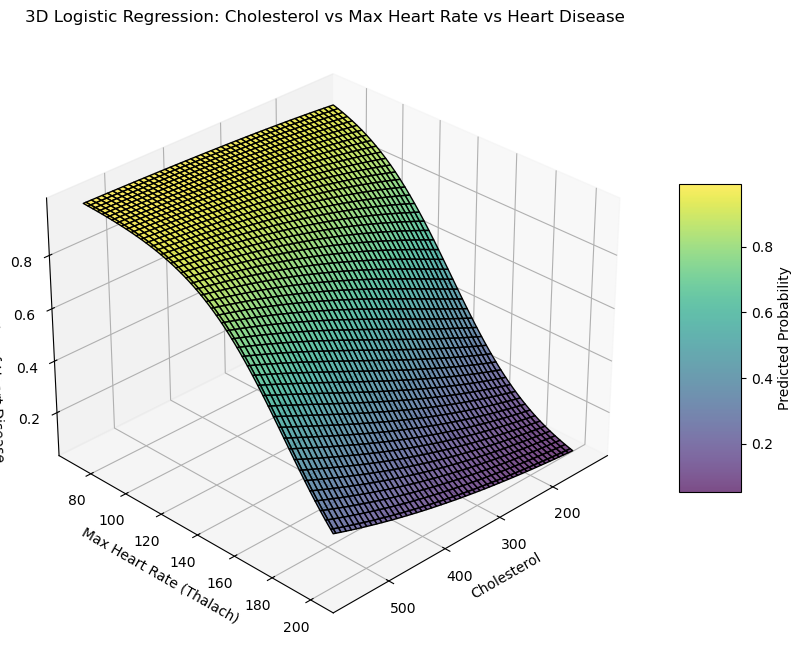

In [105]:
# Load the dataset
import statsmodels.api as sm

data = pd.read_csv(r"heart_good_database.csv")
# Prepare the independent variables (X) and dependent variable (y)
X = data[['chol', 'thalach', 'fbs']]  # 'chol' = cholesterol, 'thalach' = max heart rate, 'fbs' = fasting blood sugar
y = data['target']  # 'target' represents heart disease (1 = presence, 0 = absence)
# Add a constant to the model (intercept)
X = sm.add_constant(X)
# Fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()
# Create a grid of values for 'chol' and 'thalach'
chol_vals = np.linspace(X['chol'].min(), X['chol'].max(), 100)
thalach_vals = np.linspace(X['thalach'].min(), X['thalach'].max(), 100)
chol_grid, thalach_grid = np.meshgrid(chol_vals, thalach_vals)
# Flatten the grids to use in prediction
chol_flat = chol_grid.ravel()
thalach_flat = thalach_grid.ravel()
# Keep fasting blood sugar constant (e.g., assume fasting blood sugar < 120, fbs = 0)
fbs_constant = np.zeros_like(chol_flat)
# Create a DataFrame for prediction
grid_data = pd.DataFrame({
    'const': 1,  # Add constant for intercept
    'chol': chol_flat,
    'thalach': thalach_flat,
    'fbs': fbs_constant  # Keep fbs constant for simplicity
})
# Predict the probability of heart disease
probs = result.predict(grid_data)
# Convert the probabilities to a NumPy array and reshape it to match the grid
probs_grid = np.array(probs).reshape(chol_grid.shape)
# Create the 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
# Plot the surface
surf = ax.plot_surface(chol_grid, thalach_grid, probs_grid, cmap='viridis', edgecolor='k', alpha=0.7)
# Set axis labels
ax.set_xlabel('Cholesterol')
ax.set_ylabel('Max Heart Rate (Thalach)')
ax.set_zlabel('Predicted Probability of Heart Disease')
# Set the title
ax.set_title('3D Logistic Regression: Cholesterol vs Max Heart Rate vs Heart Disease')
# Add a color bar with a label
color_bar = fig.colorbar(surf, shrink=0.5, aspect=5)
color_bar.set_label('Predicted Probability')
# Adjust the viewing angle (elev=30, azim=45)
ax.view_init(elev=30, azim=45)  # Spin the plot by adjusting elevation and azimuth
# Show the plot
plt.show()

Key Points from the 3D Surface Plot Discussion:

Overview:

The plot shows how age and maximum heart rate (thalach) interact to affect the probability of chest pain (angina).
Age as a Predictor:

Chest pain probability increases with age.
Older patients (60+ years) are at a higher risk compared to younger individuals.
Maximum Heart Rate (Thalach):

Higher heart rates, especially during physical exertion, increase the likelihood of chest pain, particularly in older patients.
Interaction Between Age and Thalach:

Younger patients can tolerate higher heart rates with less risk of chest pain.
Older patients face a steeper rise in chest pain risk with high heart rates.
Age and heart rate together give a more nuanced understanding of chest pain risk.
Non-Linearity:

The relationship is non-linear: chest pain risk increases sharply in some areas while remaining low in others (especially in younger or low heart rate cases).
Interpretation:

Younger patients: Low chest pain risk, even with high heart rates.
Older patients: Higher heart rates significantly raise chest pain risk.
Clinical Relevance:

Helps clinicians assess patient-specific risk and guide exercise recommendations.
Older patients may need to limit intense physical activity, while younger patients might have more flexibility.
Conclusion:

The plot highlights the interactive and non-linear effects of age and heart rate on chest pain risk, offering valuable insights for personalized cardiovascular risk assessments.
A heatmap to show how the combination of exercise-induced angina (exang) and the number of major vessels affected (ca) influences chest pain probability.

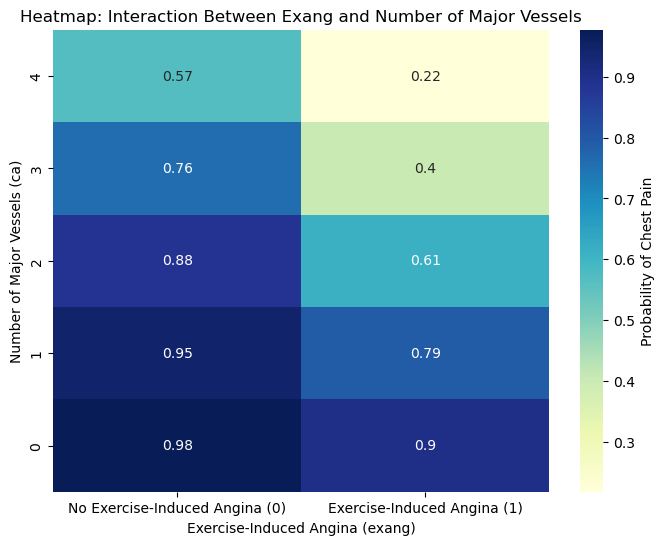

In [83]:
# Assuming 'logreg' and 'X' are defined elsewhere in the script.

# Create a grid of exang and ca values
exang_vals = [1, 0]  # 0 for No exercise-induced angina, 1 for Exercise-induced angina
ca_vals = np.arange(0, 5, 1)  # Number of major vessels can range from 0 to 4
exang_grid, ca_grid = np.meshgrid(exang_vals, ca_vals)

# Create a DataFrame for the grid of exang and ca values, keeping other features constant
grid_df = pd.DataFrame({
    'age': np.full_like(exang_grid.ravel(), X['age'].mean()),  # age = mean value as an example
    'thalach': np.full_like(exang_grid.ravel(), X['thalach'].mean()),  # thalach = mean value
    'exang': exang_grid.ravel(),
    'ca': ca_grid.ravel()
})

# Predict the probability of chest pain for each combination of exang and ca
probs = logreg.predict_proba(grid_df)[:, 1]

# Reshape predictions back to grid shape
probs_grid = probs.reshape(exang_grid.shape)

# Plot heatmap
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(probs_grid, annot=True, cmap="YlGnBu", xticklabels=['No Exercise-Induced Angina (0)', 'Exercise-Induced Angina (1)'], yticklabels=ca_vals[::-1])  # Reverse yticklabels to have 4 at the top and 0 at the bottom
plt.xlabel('Exercise-Induced Angina (exang)')
plt.ylabel('Number of Major Vessels (ca)')
plt.title('Heatmap: Interaction Between Exang and Number of Major Vessels')

# Add legend label
colorbar = heatmap.collections[0].colorbar
colorbar.set_label('Probability of Chest Pain')  # Adding label to the legend

plt.show()

Key Points from the Heatmap Discussion:

Overview:

The heatmap shows the interaction between exercise-induced angina (exang) and the number of major vessels (ca) affecting the probability of chest pain.
Key Observations:

General Trend:

Exercise-induced angina (exang = 1): Higher probability of chest pain across all vessel groups.
No exercise-induced angina (exang = 0): Lower probability of chest pain, indicating better cardiovascular stability under non-stress conditions.
Influence of Number of Major Vessels (ca):

More vessels affected (0 to 4): Increases chest pain probability for both groups.
4 vessels affected: Highest risk of chest pain (0.76 with exercise-induced angina).
Even without exercise-induced angina, the risk of chest pain rises significantly as the number of affected vessels increases.
Intermediate Groups (1-3 Vessels):

Exercise-induced angina: Still results in higher chest pain risk across all vessel groups.
Example: 3 vessels show a 0.59 probability with angina, compared to 0.21 without.
Clinical Interpretation:

Number of vessels and exercise-induced angina are key indicators of chest pain risk.
Higher vessel blockage combined with exercise-induced angina significantly raises chest pain probability.
Even without angina, having multiple blocked vessels is a strong predictor of chest pain.
Conclusion:

Both exercise-induced angina and the number of affected vessels are critical risk factors for chest pain.
Regular cardiovascular assessments are essential, especially for patients with multiple affected vessels or coronary artery disease.

In [ ]:
#Hypothesis#5 (KIRSHAN)
#Patients with a higher number of major vessels (colored by fluoroscopy) are less likely to have heart disease

group_counts = heart_disease_df.groupby(['ca', 'target']).size().reset_index(name='count')
# Display the result
print(group_counts)



<Figure size 1000x600 with 0 Axes>

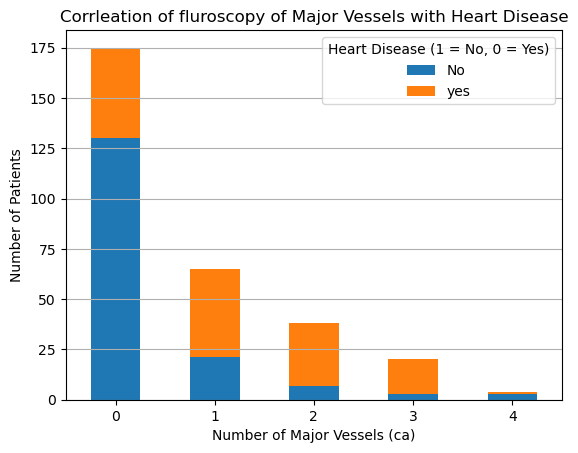

In [88]:
#Hypothesis#5
#Patients with a higher number of major vessels (colored by fluoroscopy) are more likely to have heart disease
# Pivot the DataFrame for easier plotting
pivot_counts = group_counts.pivot(index='ca', columns='target', values='count').fillna(0)

# Plotting
plt.figure(figsize=(10, 6))
pivot_counts.plot(kind='bar', stacked=True)

# Adding titles and labels
plt.title('Corrleation of fluroscopy of Major Vessels with Heart Disease')
plt.xlabel('Number of Major Vessels (ca)')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)  # Rotate x-ticks for better readability
plt.legend(title='Heart Disease (1 = No, 0 = Yes)', labels=['No', 'yes'])

#plt.legend(title='Heart Disease (0 = Yes, 1 = No)', labels=['Yes', 'No'])

plt.grid(axis='y')
plt.show()

In [89]:
# Create a contingency table
contingency_table = pd.crosstab(heart_disease_df['ca'], heart_disease_df['target'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

# Interpretation of the result
alpha = 0.05  # significance level
if p < alpha:
    print("Reject the null hypothesis - there is a significant relationship between the number of blood vessels (ca) and heart disease.")
else:
    print("Fail to reject the null hypothesis - there is no significant relationship between the number of blood vessels (ca) and heart disease.")


Chi-Square Statistic: 73.68984583164412
P-Value: 3.771038067427659e-15
Degrees of Freedom: 4
Expected Frequencies Table:
[[95.03311258 79.96688742]
 [35.29801325 29.70198675]
 [20.63576159 17.36423841]
 [10.86092715  9.13907285]
 [ 2.17218543  1.82781457]]
Reject the null hypothesis - there is a significant relationship between the number of blood vessels (ca) and heart disease.


/var/folders/9g/q_vt4mks1rz6myydd0n5jcwc0000gn/T/ipykernel_10715/2018992821.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_disease_df['thalach_binned'] = pd.cut(heart_disease_df['thalach'], bins=10)


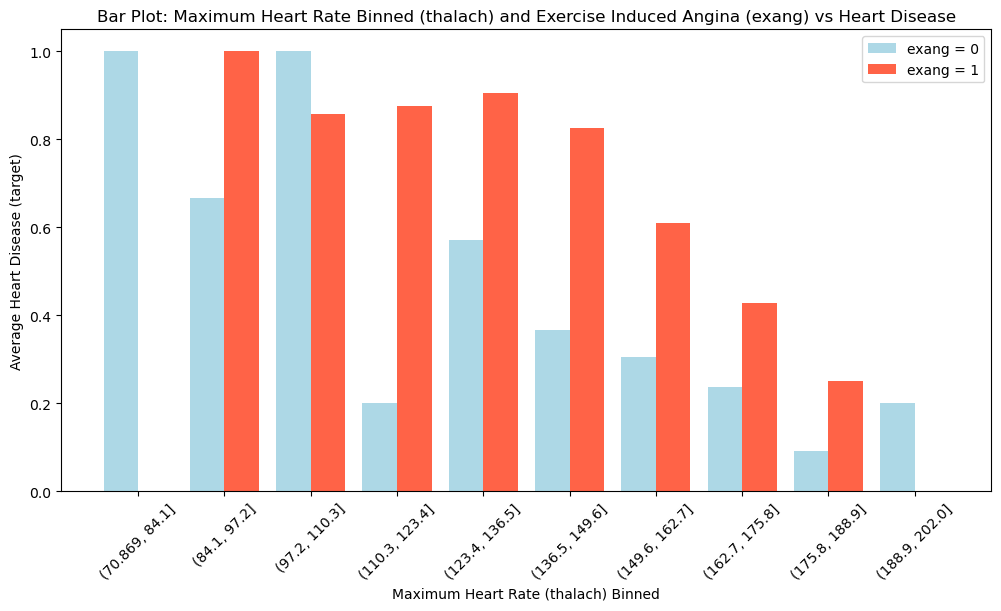

In [98]:
#Hypothesis#6 (ANVITA)

#Patients with a higher maximum heart rate achieved during exercise and exercise induced angina are less likely to have heart disease.
# Create bins for 'thalach' (Maximum Heart Rate) for better bar plot visualization
# This must be done before grouping

#heart_disease_df['thalach_binned'] = pd.cut(heart_disease_df['thalach'], bins=10)
# Group the data by the binned thalach values, exercise-induced angina, and target (heart disease)
# Set observed=False to retain the current behavior
bar_data = heart_disease_df.groupby(['thalach_binned', 'exang'], observed=False)['target'].mean().reset_index()
# Set up the figure for the bar plot
plt.figure(figsize=(12, 6))
# Create labels for thalach bins
thalach_labels = bar_data['thalach_binned'].astype(str).unique()  # Unique bin labels
x_values = range(len(thalach_labels))  # X values corresponding to the bins
# Pivot the table to have separate columns for exang = 0 and exang = 1, filling missing values with 0
pivot_data = bar_data.pivot(index='thalach_binned', columns='exang', values='target').fillna(0)
# Plot bars for exang = 0 and exang = 1
width = 0.4
plt.bar(x=x_values, height=pivot_data[0], width=width, align='center', label='exang = 0', color='lightblue')
plt.bar([x + width for x in x_values], height=pivot_data[1], width=width, align='center', label='exang = 1', color='tomato')
# Add labels and title
plt.title('Bar Plot: Maximum Heart Rate Binned (thalach) and Exercise Induced Angina (exang) vs Heart Disease')
plt.xlabel('Maximum Heart Rate (thalach) Binned')
plt.ylabel('Average Heart Disease (target)')
plt.xticks([x + width / 2 for x in x_values], thalach_labels, rotation=45)  # Adjust x-ticks for better alignment
# Add legend to differentiate between exang = 0 and exang = 1
plt.legend()
# Display the barplot
plt.show()




In [100]:
# Include a heatmap
# Exclude the 'country' column
#Calculate the correlation matrix
corr_matrix = heart_disease_df.corr()
#Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
#Show the heatmap
plt.title('Correlation Heatmap (Excluding Country Column)')
plt.show()


ValueError: could not convert string to float: '40-49'

age                  int64
sex                  int64
cp                   int64
trestbps             int64
chol                 int64
fbs                  int64
restecg              int64
thalach              int64
exang                int64
oldpeak            float64
slope                int64
ca                   int64
thal                 int64
target               int64
age_group         category
thalach_binned    category
dtype: object


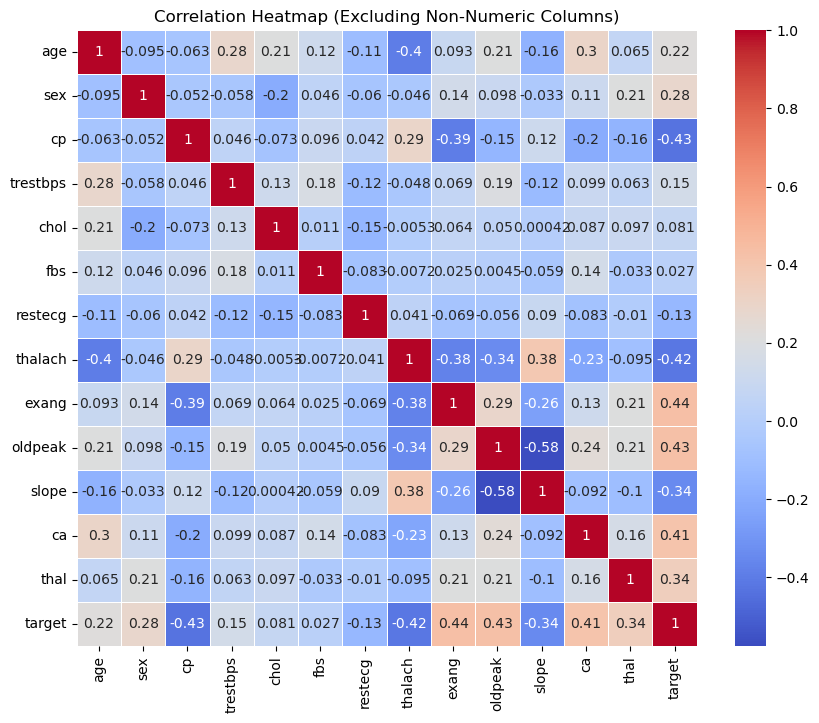

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming heart_disease_df is your DataFrame
# Check the data types
print(heart_disease_df.dtypes)

# Exclude non-numeric columns (like 'country' and any other non-numeric columns)
numeric_df = heart_disease_df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Show the heatmap
plt.title('Correlation Heatmap (Excluding Non-Numeric Columns)')
plt.show()
